In [9]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',None)
from data_reader import read_data
from grid_reader import read_grids
from grid_mapper import map_to_taxiZones
from visit_counter import count_visits

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step1) read mobile phone data and convert it to geodata

In [2]:
file_name = 'data/poi_NY_initial_subset.csv'
geo_data = read_data(file_name)
geo_data.head(5)

,Unnamed: 0,location_name,latitude,longitude,street_address,city,region,postal_code,visitor_home_cbgs,geometry
0,0,Friday Spa,40.763570,-73.989487,402 W 51st St,New York,NY,10019,NaN,POINT (-73.98949 40.76357)
1,1,Bromley Coats,40.751652,-73.989541,463 Fashion Ave Fl 12,New York,NY,10018,"{""360610086031"":4,""360470020002"":4}",POINT (-73.98954 40.75165)
2,2,Chase ATM,40.771845,-73.964856,35 E 72nd St,New York,NY,10021,NaN,POINT (-73.96486 40.77184)
3,3,The Great American Bagel,40.710502,-74.008860,200 Broadway,New York,NY,10038,"{""CA:35212140"":4,""471450302024"":4,""36047083600...",POINT (-74.00886 40.71050)
4,4,GCMP tv,40.752270,-73.974515,144 E 44th St,New York,NY,10017,NaN,POINT (-73.97451 40.75227)


### Extract subset of mobile data of those vissited the target region, i.g., Hudson Yards

# Step 2) Read grids: Cencus Block Group grids and Taxi zones

we have 6758 unique cbg zones in New York City in all 5 boroughs


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry
0,36,081,093401,2,1500000US360810934012,360810934012,2,Block Group 2,BG,132716,0,"POLYGON ((-73.84400 40.57951, -73.84305 40.577..."
1,36,061,013502,0,1500000US360610135020,360610135020,0,Block Group 0,BG,0,248165,"POLYGON ((-74.00162 40.77455, -74.00045 40.776..."
2,36,005,051601,2,1500000US360050516012,360050516012,2,Block Group 2,BG,256313,0,"POLYGON ((-73.79188 40.85522, -73.78743 40.849..."


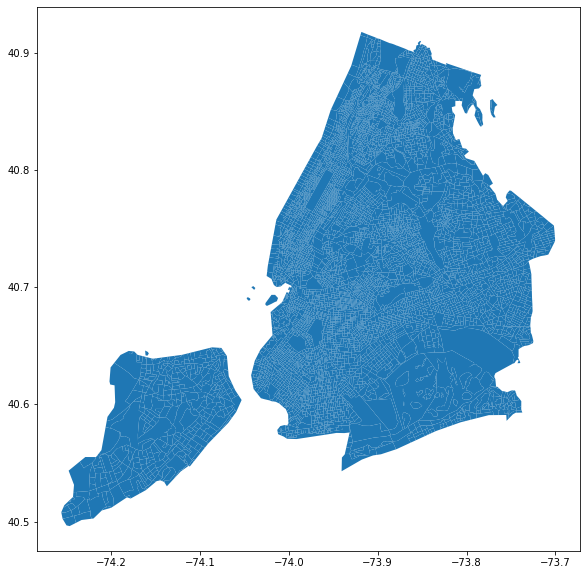

In [5]:
cbg_grids_name = "cb_2021_36_bg_500k.shp"
nyc_geoids, cbgs_nyc = read_grids(cbg_grids_name, grid_name = 'Cencus Blocks')
cbgs_nyc.head(3)

we have 263 unique taxi zones


,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."


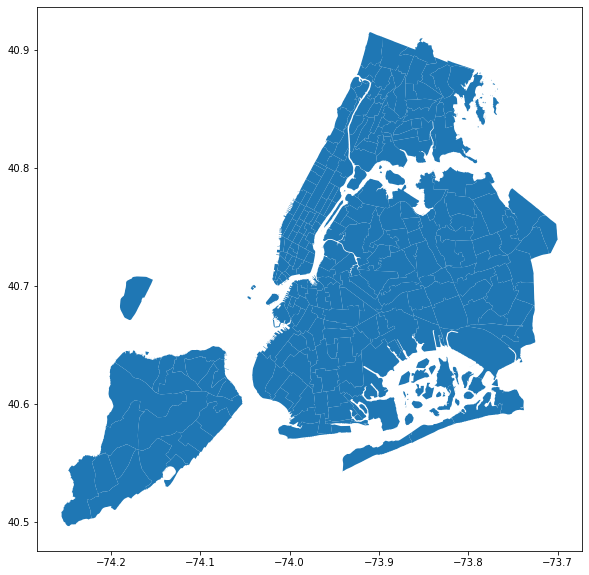

In [4]:
taxi_grids_name = "geo_export_e612eba5-03f4-49f0-a0ac-528f1c3802b8.shp"
taxi_zones = read_grids(taxi_grids_name, grid_name = 'taxi zones')
taxi_zones.head(3)

# Step 3) Grid coarsening: Cencus Block Group grids onto Taxi zones

In [6]:
cbgs_nyc = map_to_taxiZones(cbgs_nyc, taxi_zones)
cbgs_nyc.head(3)

6758
0


/home/sevin/Desktop/spring2023/TA_art_of_engineering/repository/art_of_engineering_course/grid_mapper.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbgs_nyc['taxi_object_id'][i] = taxi_obj_id
/home/sevin/Desktop/spring2023/TA_art_of_engineering/repository/art_of_engineering_course/grid_mapper.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbgs_nyc['taxi_geometry'][i] =  taxi_poly


1000
2000
3000
4000
5000
6000


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,taxi_object_id,taxi_geometry
0,36,081,093401,2,1500000US360810934012,360810934012,2,Block Group 2,BG,132716,0,"POLYGON ((-73.84400 40.57951, -73.84305 40.577...",201.0,"POLYGON ((-73.81849901800001 40.5873623529999,..."
1,36,061,013502,0,1500000US360610135020,360610135020,0,Block Group 0,BG,0,248165,"POLYGON ((-74.00162 40.77455, -74.00045 40.776...",None,None
2,36,005,051601,2,1500000US360050516012,360050516012,2,Block Group 2,BG,256313,0,"POLYGON ((-73.79188 40.85522, -73.78743 40.849...",46.0,(POLYGON ((-73.78452431937963 40.8604770631478...


## Step 4) Read attraction grid

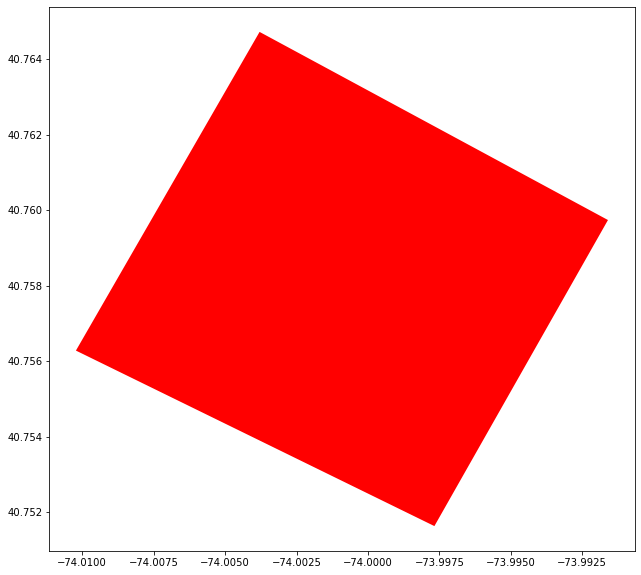

In [10]:
grids_name = "Hudson_Yards_Cut.shp"
attraction_zone = read_grids(grids_name, grid_name = 'attraction')


<AxesSubplot:>

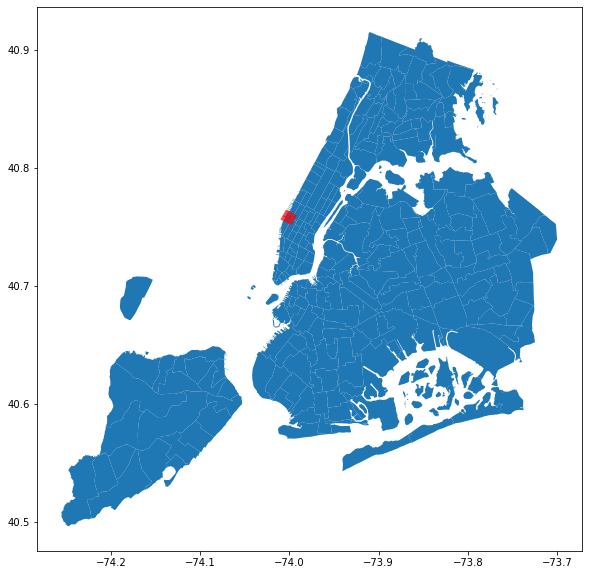

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
taxi_zones.plot(ax=ax) #, column='objectid'
attraction_zone.plot(ax=ax, color='red', alpha=0.7)

## Step 5) Count visitors per grid

In [12]:
geo_data = geo_data[geo_data.within(attraction_zone.loc[0,'geometry'])]
geo_data = geo_data[~geo_data['visitor_home_cbgs'].isna()][['location_name','visitor_home_cbgs']] #clean data
visits = count_visits(geo_data, nyc_geoids)
visits.head(4)

There are visitors from 1835 unique cbgs zone


,geoid,cnt
0,360610103001,166
1,360610115001,111
2,360610111001,103
3,360810263001,21


In [14]:
merged = pd.merge(cbgs_nyc, visits, left_on = 'GEOID', right_on = 'geoid', how = 'right' )[['taxi_object_id','cnt','geometry','geoid','GEOID']]
merged = merged[~merged['taxi_object_id'].isna()]
merged.head(2)

,taxi_object_id,cnt,geometry,geoid,GEOID
0,68.0,166,"POLYGON ((-73.99963 40.75392, -73.99914 40.754...",360610103001,360610103001
1,48.0,111,"POLYGON ((-73.99356 40.75714, -73.99263 40.758...",360610115001,360610115001


In [15]:
d = pd.DataFrame(merged.groupby('taxi_object_id').sum()['cnt']).reset_index(drop=False)
d = pd.merge(taxi_zones, d, left_on='objectid', right_on='taxi_object_id', how='right' )  
d.head(3)

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,taxi_object_id,cnt
0,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3.0,12
1,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4.0,36
2,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5.0,14


<AxesSubplot:>

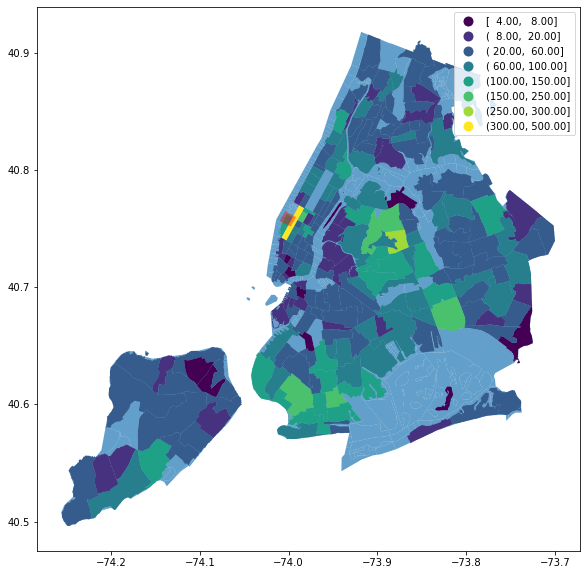

In [17]:
# %matplotlib qt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
cbgs_nyc.plot(ax=ax, alpha=0.7) #, column='objectid'

tmp = d[~d['geometry'].isna()] #viridis, RdBu
# bins = mapclassify.Quantiles(tmp['cnt'], k=5).bins
tmp.plot(column = 'cnt', ax = ax, legend=True, cmap='viridis',
        scheme ='User_Defined', #quantiles
        classification_kwds =dict(bins=[ 8,20, 60, 100, 150, 250,300, 500])) #[4, 8, 50, 100, 200, merged['cnt'].max()]
attraction_zone.plot(ax=ax, color='red', alpha = 0.4)